In [1]:
import os
import pandas as pd
from actiDep.data.loader import Actidep, Subject
ds= Actidep('/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids')
csv_files=ds.get_global(pipeline='tractometry',extension='.csv')

In [2]:
data_rows = []
for csv_file in csv_files:
    entities = csv_file.get_entities()
    sub_df = pd.read_csv(csv_file.path, delimiter=';').T
    
    for bundle_idx, vals in sub_df.iterrows():
        for point_idx, val in enumerate(vals):
            row = {**entities, 'point_idx': point_idx, 'bundle': bundle_idx, 'value': val}
            data_rows.append(row)

df = pd.DataFrame(data_rows)
df


,sub,metric,model,subject,extension,suffix,point_idx,bundle,value
0,01012,MD,staniz,01012,.csv,mean,0,ORright,0.000336
1,01012,MD,staniz,01012,.csv,mean,1,ORright,0.000349
2,01012,MD,staniz,01012,.csv,mean,2,ORright,0.000359
3,01012,MD,staniz,01012,.csv,mean,3,ORright,0.000372
4,01012,MD,staniz,01012,.csv,mean,4,ORright,0.000389
...,...,...,...,...,...,...,...,...,...
2403595,03024,IRF,staniz,03024,.csv,mean,95,CC3,0.219370
2403596,03024,IRF,staniz,03024,.csv,mean,96,CC3,0.228575
2403597,03024,IRF,staniz,03024,.csv,mean,97,CC3,0.237626
2403598,03024,IRF,staniz,03024,.csv,mean,98,CC3,0.258831


In [3]:
full_db='/home/ndecaux/NAS_EMPENN/share/projects/actidep/bids/participants_full_info.xlsx'
full_db_df = pd.read_excel(full_db)
full_db_df['sub'] = full_db_df['participant_id'].apply(
    lambda x: x.split('-')[-1])
df = df.merge(full_db_df, left_on='sub', right_on='sub', how='left')


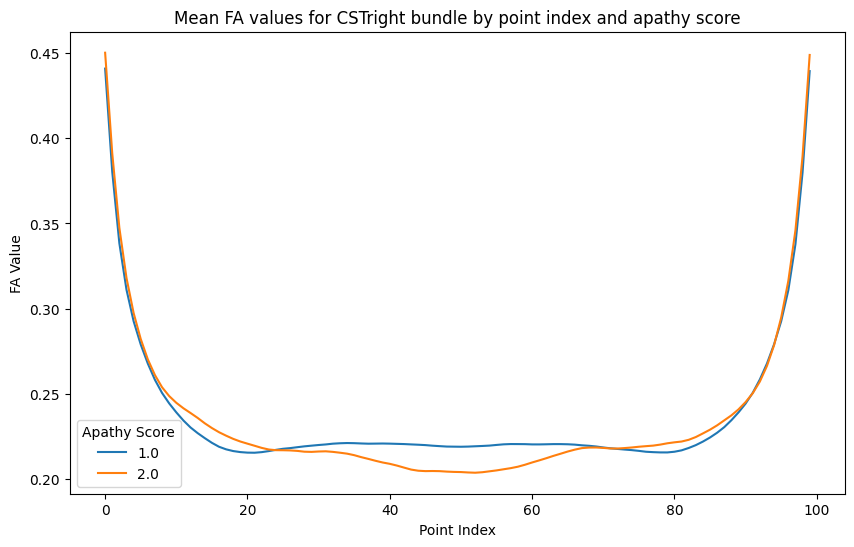

: 

In [ ]:
#Plot for bundle CSTright the mean values according to point_idx, grouped by apathy score
# Convert point_idx and value to numeric first
df['point_idx'] = pd.to_numeric(df['point_idx'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')
filter_dict = {'bundle': 'CSTleft', 'metric': 'IFW'}
# Filter for CSTright bundle and FA metric (if it exists)
filtered_df = df[(df['bundle'] == filter_dict['bundle'])
                 & (df['metric'] == filter_dict['metric'])]
import matplotlib.pyplot as plt

# Group by both apathy score and point_idx, then calculate mean
apathy_grouped = filtered_df.groupby(['apathy', 'point_idx'])['value'].mean().unstack(level=0)

# Plot each apathy score as a separate line
apathy_grouped.plot(kind='line', figsize=(10, 6))
plt.title('Mean FA values for CSTright bundle by point index and apathy score')
plt.xlabel('Point Index')
plt.ylabel('FA Value')
plt.legend(title='Apathy Score')
plt.show()